<a href="https://colab.research.google.com/github/Houndjoisaacetonam/Openclassroomprojet/blob/main/Maison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
with open('data_description.txt', 'r') as f:
  print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [2]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df.drop('Id', axis=1, inplace=True)

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [68]:
def manquant (df):
  pourc = 100 * df.isnull().sum()/len(df)
  pourc = pourc[pourc>0].sort_values()
  return pourc

In [81]:
val = manquant(df)

In [70]:
val

,0
Electrical,0.068587
MasVnrArea,0.548697
BsmtQual,2.537723
BsmtCond,2.537723
BsmtFinType1,2.537723
BsmtExposure,2.606310
BsmtFinType2,2.606310
GarageCond,5.555556
GarageQual,5.555556
GarageFinish,5.555556


In [62]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

,SalePrice
KitchenAbvGr,-0.135946
EnclosedPorch,-0.128646
MSSubClass,-0.084276
OverallCond,-0.077948
YrSold,-0.028882
LowQualFinSF,-0.025625
MiscVal,-0.021203
BsmtHalfBath,-0.016881
BsmtFinSF2,-0.011422
3SsnPorch,0.044568


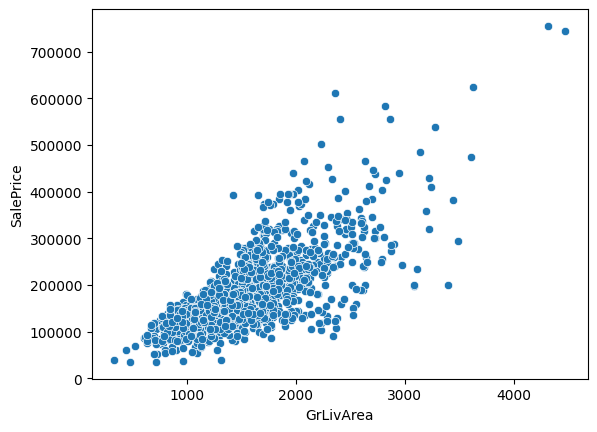

In [63]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df);

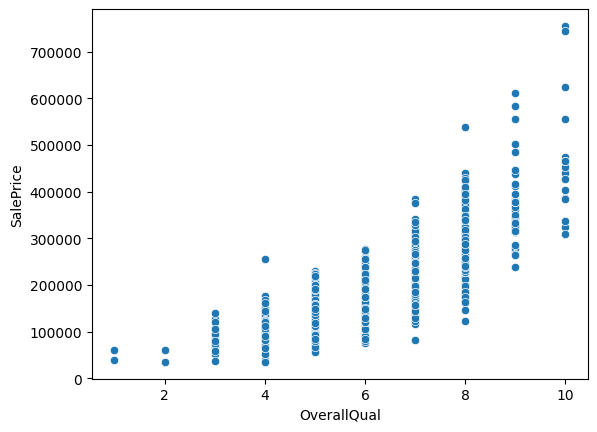

In [64]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df);

In [65]:
df[(df['SalePrice'] < 300000) & (df['GrLivArea'] > 4000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [66]:
df[(df['SalePrice'] < 250000) & (df['OverallQual'] > 9)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [41]:
df.drop([523, 1298], axis=0, inplace=True)

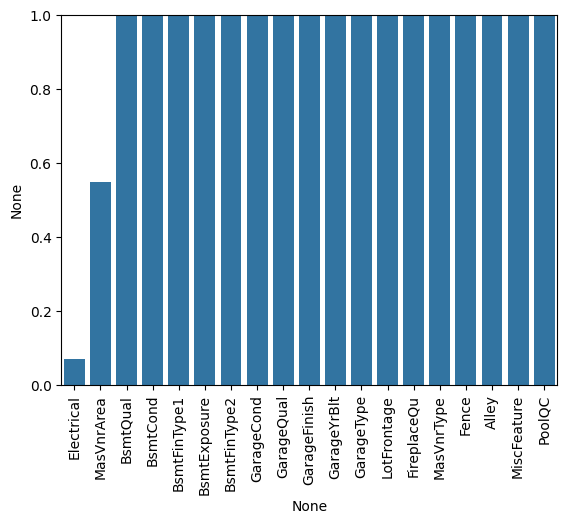

In [80]:
sns.barplot(x=val.index, y=val);
plt.ylim(0, 1);
plt.xticks(rotation=90);

In [77]:
df[df['Electrical'].isnull()]['Electrical']

,Electrical
1379,NaN


In [78]:
df['Electrical'].value_counts()

,count
Electrical,
SBrkr,1332
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [79]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [95]:
val = manquant(df)

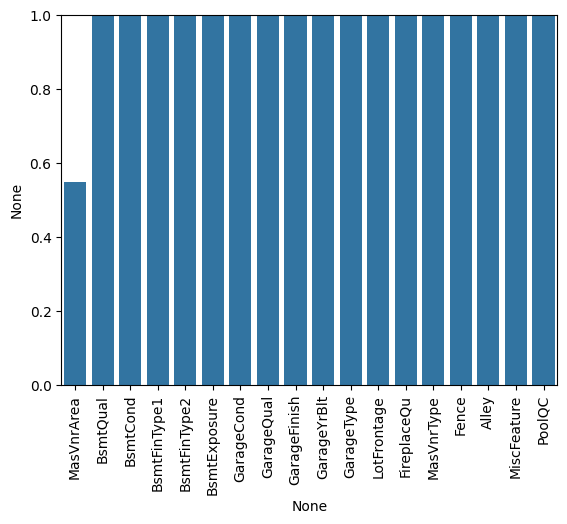

In [83]:
sns.barplot(x=val.index, y=val);
plt.ylim(0, 1);
plt.xticks(rotation=90);

In [94]:
df['MasVnrArea'].fillna(0, inplace=True)

In [102]:
val = manquant(df)

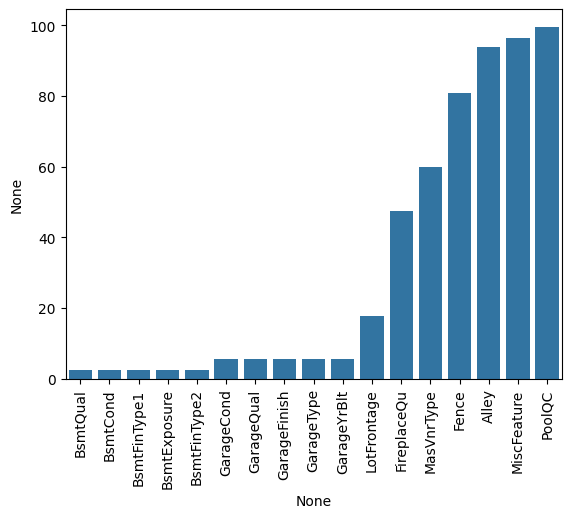

In [98]:
sns.barplot(x=val.index, y=val);
plt.xticks(rotation=90);

In [100]:
bat = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']

In [101]:
df[bat] = df[bat].fillna('None')

In [111]:
val = manquant(df)

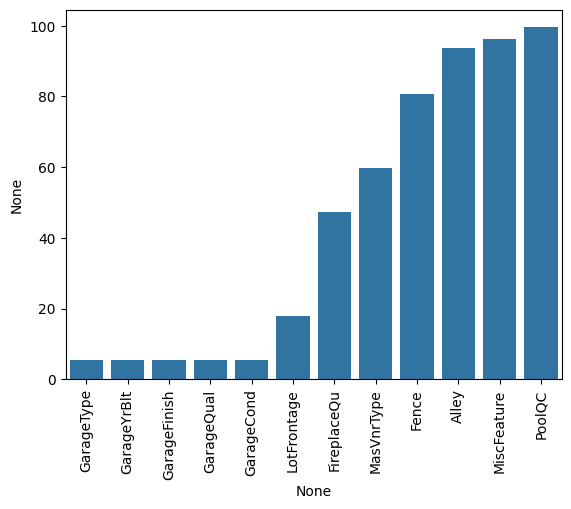

In [104]:
sns.barplot(x=val.index, y=val);
plt.xticks(rotation=90);

In [108]:
gar = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [110]:
df[gar] = df[gar].fillna('None')

In [116]:
val = manquant(df)

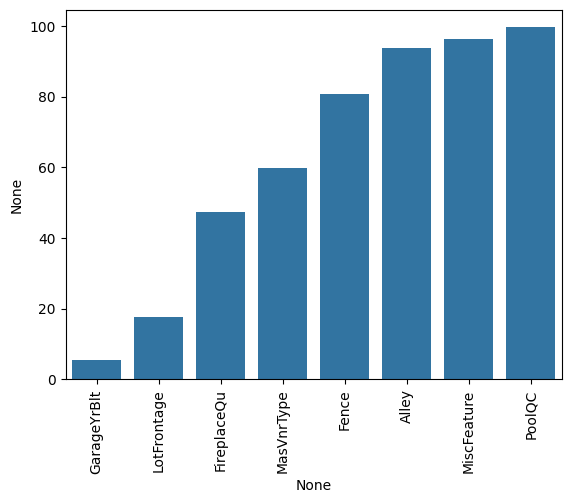

In [113]:
sns.barplot(x=val.index, y=val);
plt.xticks(rotation=90);

In [114]:
non = ['FireplaceQu', 'Fence', 'MiscFeature', 'Alley', 'PoolQC']

In [115]:
df[non] = df[non].fillna('None')

In [117]:
val = manquant(df)

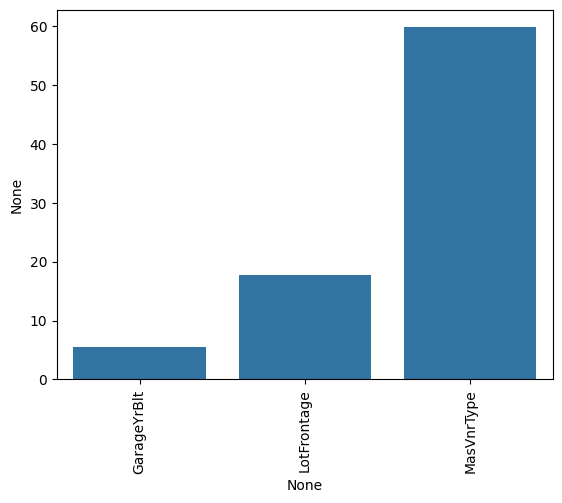

In [118]:
sns.barplot(x=val.index, y=val);
plt.xticks(rotation=90);

In [121]:
df['GarageYrBlt'].fillna(0, inplace=True)

In [122]:
val = manquant(df)

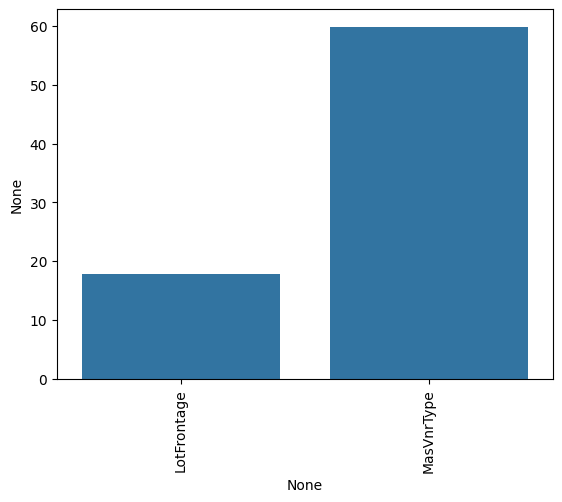

In [123]:
sns.barplot(x=val.index, y=val);
plt.xticks(rotation=90);

In [125]:
df.groupby('Neighborhood')['LotFrontage'].mean()

,LotFrontage
Neighborhood,
Blmngtn,47.142857
Blueste,24.000000
BrDale,21.562500
BrkSide,57.509804
ClearCr,83.461538
CollgCr,71.682540
Crawfor,71.804878
Edwards,64.811111
Gilbert,79.877551


In [126]:
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('Neighborhood')['LotFrontage'].transform('mean'))

In [134]:
val = manquant(df)

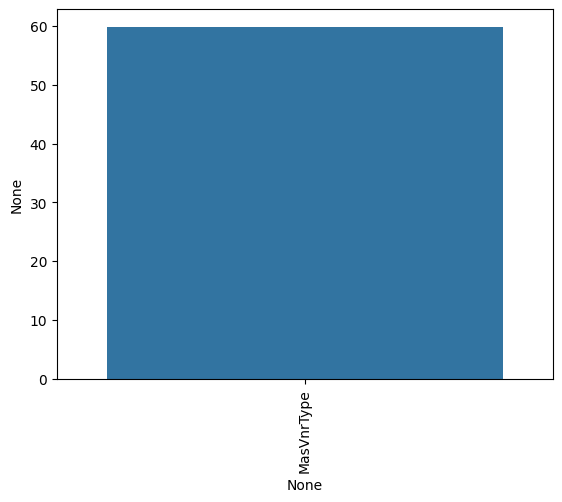

In [128]:
sns.barplot(x=val.index, y=val);
plt.xticks(rotation=90);

In [133]:
df['MasVnrType'].fillna('None', inplace=True)

In [135]:
val = manquant(df)

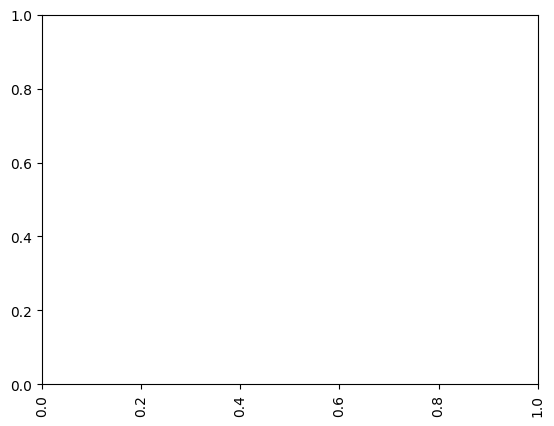

In [136]:
sns.barplot(x=val.index, y=val);
plt.xticks(rotation=90);

In [137]:
numeric = df.select_dtypes(include='number')

In [138]:
non_numeric = df.select_dtypes(exclude='number')

In [140]:
trans = pd.get_dummies(non_numeric, drop_first=True)

In [141]:
df = pd.concat([numeric, trans], axis=1)

In [142]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,False,True,False,False,False,True,False


In [143]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

Mise à l'échelle

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scale = StandardScaler()

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [148]:
scale_X_train = scale.fit_transform(X_train)
scale_X_test = scale.transform(X_test)

Pipeline avec gridsearch

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

In [156]:
pipe = Pipeline([('model', LinearRegression())])

In [157]:
param_grid = [
              {'model': [LinearRegression()]},
              {'model': [Ridge()], 'model__alpha': [0.01, 0.1, 1, 10, 100]},
              {'model': [ElasticNet()], 'model__alpha': [0.01, 0.1, 1, 10, 100], 'model__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]},
              {'model': [Lasso()], 'model__alpha': [0.01, 0.1, 1, 10, 100]}

              ]

In [158]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

In [159]:
grid.fit(scale_X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.635e+10, tolerance: 5.297e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+09, tolerance: 4.944e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.379e+10, tolerance: 5.403e

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [Ridge()],
                          'model__alpha': [0.01, 0.1, 1, 10, 100]},
                         {'model': [ElasticNet()],
                          'model__alpha': [0.01, 0.1, 1, 10, 100],
                          'model__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]},
                         {'model': [Lasso()],
                          'model__alpha': [0.01, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error')

In [160]:
grid.best_estimator_

Pipeline(steps=[('model', Ridge(alpha=100))])

In [161]:
grid.best_params_

{'model': Ridge(), 'model__alpha': 100}

In [162]:
grid.best_index_

5

In [163]:
grid.best_score_

-643727081.8665917

MAE, RMSE, SCORE

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [195]:
pred = grid.predict(scale_X_test)

In [196]:
mae = mean_absolute_error(y_test, pred)
mae

16703.094620075033

In [197]:
rmse = mean_squared_error(y_test, pred)
rmse

684700177.8745297

In [198]:
score = r2_score(y_test, pred)
score

0.888810572767287

Arbre de décision avec gridsearch

In [174]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [172]:
tree = DecisionTreeRegressor()

In [175]:
param_grid = {'max_depth': [5, 10, 15, 20, 25, 30],
              'min_samples_split': [5, 10, 15, 20, 25, 30],
              'min_samples_leaf': [5, 10, 15, 20, 25, 30],
              'random_state': [101]}

In [176]:
arbre = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error')

In [177]:
arbre.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30],
                         'min_samples_split': [5, 10, 15, 20, 25, 30],
                         'random_state': [101]},
             scoring='neg_mean_squared_error')

In [179]:
arbre.best_params_

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'random_state': 101}

In [180]:
tree_pred = arbre.predict(X_test)

In [183]:
mae = mean_absolute_error(y_test, tree_pred)
mae

25980.574291436624

In [199]:
rmse = mean_squared_error(y_test, tree_pred)
rmse

1551472988.1036685

In [200]:
r2 = r2_score(y_test, tree_pred)
r2

0.7480541140652598

RandomForest avec gridsearchcv

In [203]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [202]:
aleatoire = RandomForestRegressor()

In [204]:
param_grid = {'n_estimators': [100,],
              'max_features': ['auto', 'sqrt', 'log2', 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25, 30],
              'min_samples_split': [5, 10, 15, 20, 25, 30],
              'random_state': [101],
              'oob_score': [True, False],
              'bootstrap': [True, False]

}

In [205]:
foret = GridSearchCV(aleatoire, param_grid, cv=5, scoring='neg_mean_squared_error')

In [206]:
foret.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1620 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2', 2, 3, 4],
                         'min_samples_split': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [100], 'oob_score': [True, False],
                         'random_state': [101]},
             scoring='neg_mean_squared_error')

In [211]:
foret.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 100,
 'oob_score': False,
 'random_state': 101}

In [207]:
foret_pred = foret.predict(X_test)

In [208]:
mae = mean_absolute_error(y_test, foret_pred)
mae

17642.872220746405

In [209]:
rmse = mean_squared_error(y_test, foret_pred)
rmse

797300894.5125136

In [210]:
foret_score = r2_score(y_test, foret_pred)
foret_score

0.8705251836385219

Méthodes Adaboost avec GridsearchCV

In [212]:
from  sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [220]:
boost = AdaBoostRegressor(n_estimators=100, random_state=101)

In [221]:
boost.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=101)

In [222]:
boost_pred = boost.predict(X_test)

In [223]:
boost_score = r2_score(y_test, boost_pred)
boost_score

0.8140801384267002

In [224]:
from sklearn.ensemble import GradientBoostingRegressor

In [225]:
grad = GradientBoostingRegressor()

In [249]:
param_grid = {'n_estimators': [500, 600, 700, 800, 900, 1000],
              'max_features': ['sqrt'],
              'random_state': [101],
              'criterion': ['friedman_mse']
}

In [250]:
grid_grad = GridSearchCV(grad, param_grid, cv=5, scoring='neg_mean_squared_error')

In [251]:
grid_grad.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=101),
             param_grid={'criterion': ['friedman_mse'],
                         'max_features': ['sqrt'],
                         'n_estimators': [500, 600, 700, 800, 900, 1000],
                         'random_state': [101]},
             scoring='neg_mean_squared_error')

In [252]:
grid_grad.best_params_

{'criterion': 'friedman_mse',
 'max_features': 'sqrt',
 'n_estimators': 1000,
 'random_state': 101}

In [253]:
grad_pred = grid_grad.predict(X_test)

In [254]:
grad_score = r2_score(y_test, grad_pred)
grad_score

0.9042438270454521

Le meilleur score est celui de GradientBoostingRegressor avec un score de 0.9042438270454521